# **Predictive Modeling for Rocket Landing Success**  
### *A Machine Learning Approach Using SpaceX Falcon 9 Data* 


## **EDA (Exploratory Data Analysis)**

### Import Libraries


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the SpaceX dataset `data_falcon9_V2.csv`

In [6]:
file_path = r"C:\Users\cjchavarria\Desktop\Rocket-Landing-Success-ML\02-data-wrangling\data_falcon9_V2.csv"

In [7]:
df = pd.read_csv( file_path )

In [8]:
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


#### Analyzing the impact of `FlightNumber` and `PayloadMass` on launch outcomes

In this step, we examine how the `FlightNumber` (indicating the sequence of launches) and `PayloadMass` affect the success of the first stage landing. We hypothesize that:

1. As the flight number increases, SpaceX may have improved its technology and procedures, increasing the likelihood of successful landings.
2. Payload mass may inversely affect the success rate, as heavier payloads could make the landing process more challenging.

To visualize these relationships, we plot `FlightNumber` against `PayloadMass` and overlay the launch outcomes (`Class`).


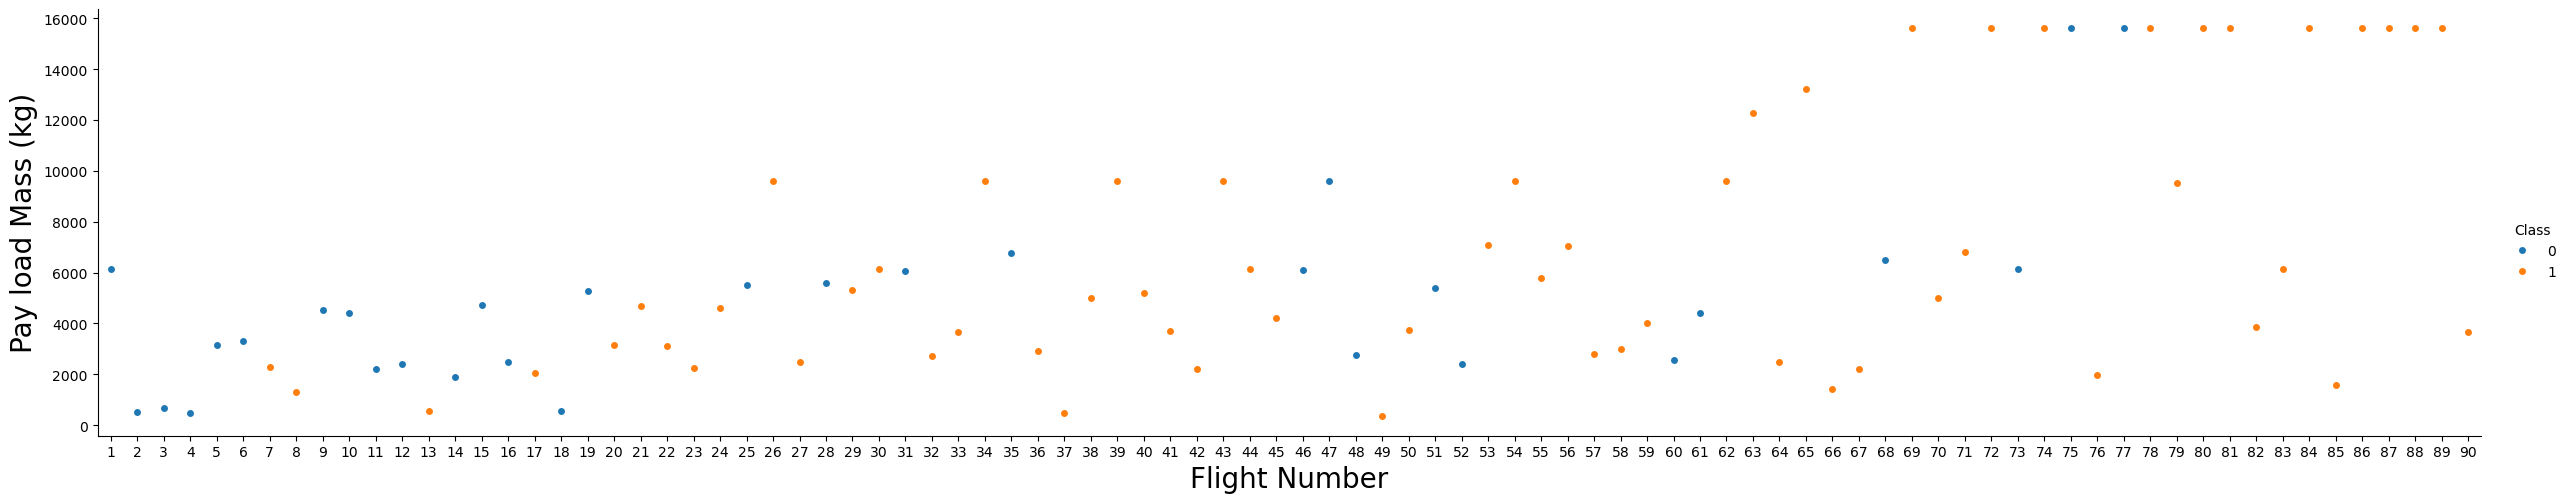

In [ ]:
sns.catplot(y = "PayloadMass", x = "FlightNumber", hue = "Class", data = df , aspect = 5)
plt.xlabel("Flight Number", fontsize = 20)
plt.ylabel("Pay load Mass (kg)", fontsize = 20)
plt.show()

#### Visualize the relationship between Flight Number and Launch Site

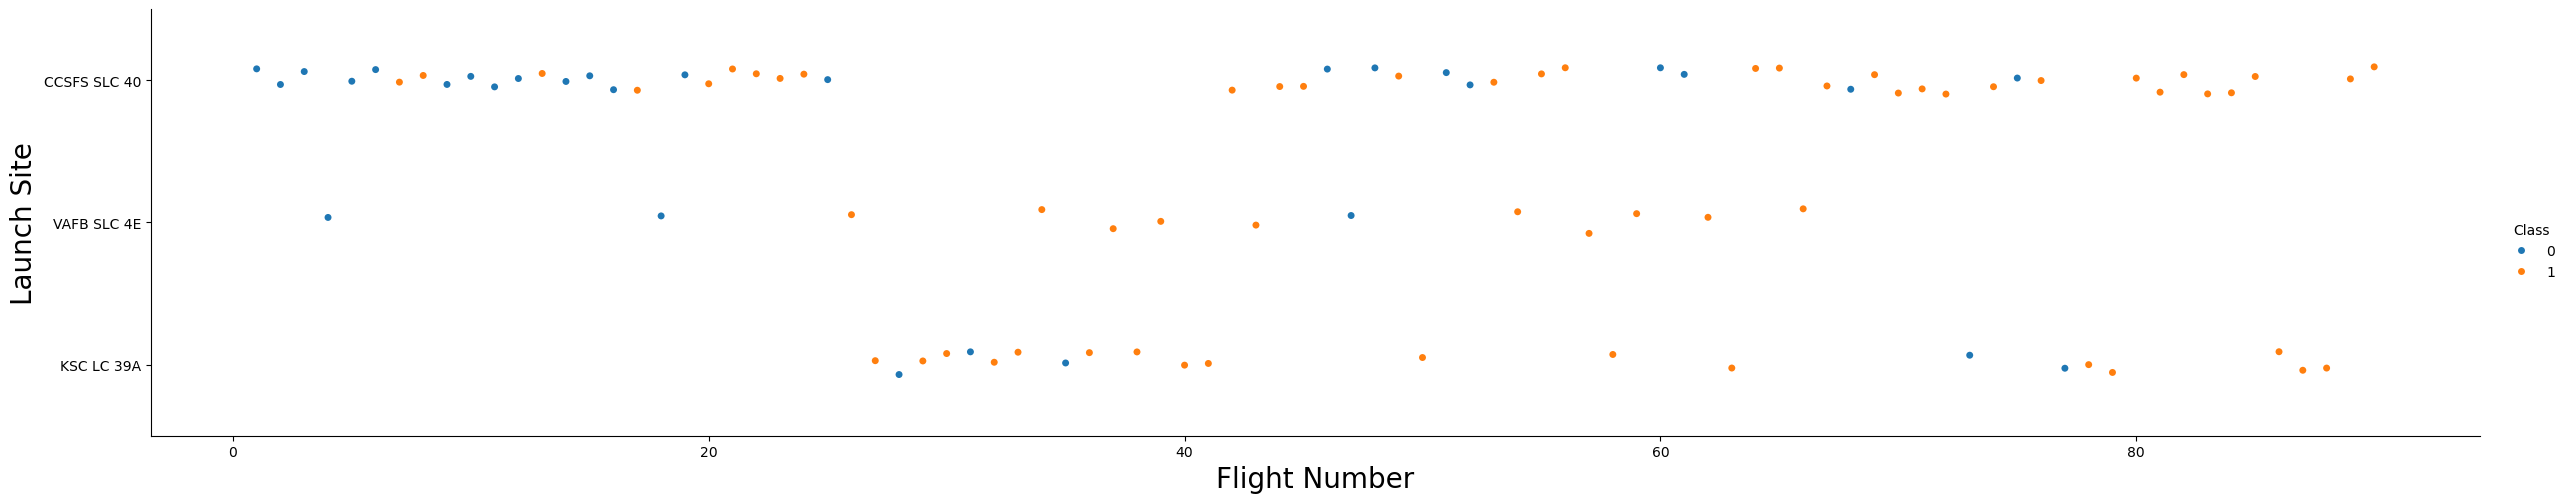

In [11]:
sns.catplot(y = "LaunchSite", x = "FlightNumber", hue = "Class", data = df, aspect = 5)
plt.xlabel("Flight Number", fontsize = 20)
plt.ylabel("Launch Site", fontsize = 20)
plt.show()

#### Visualize the relationship between Payload and Launch Site

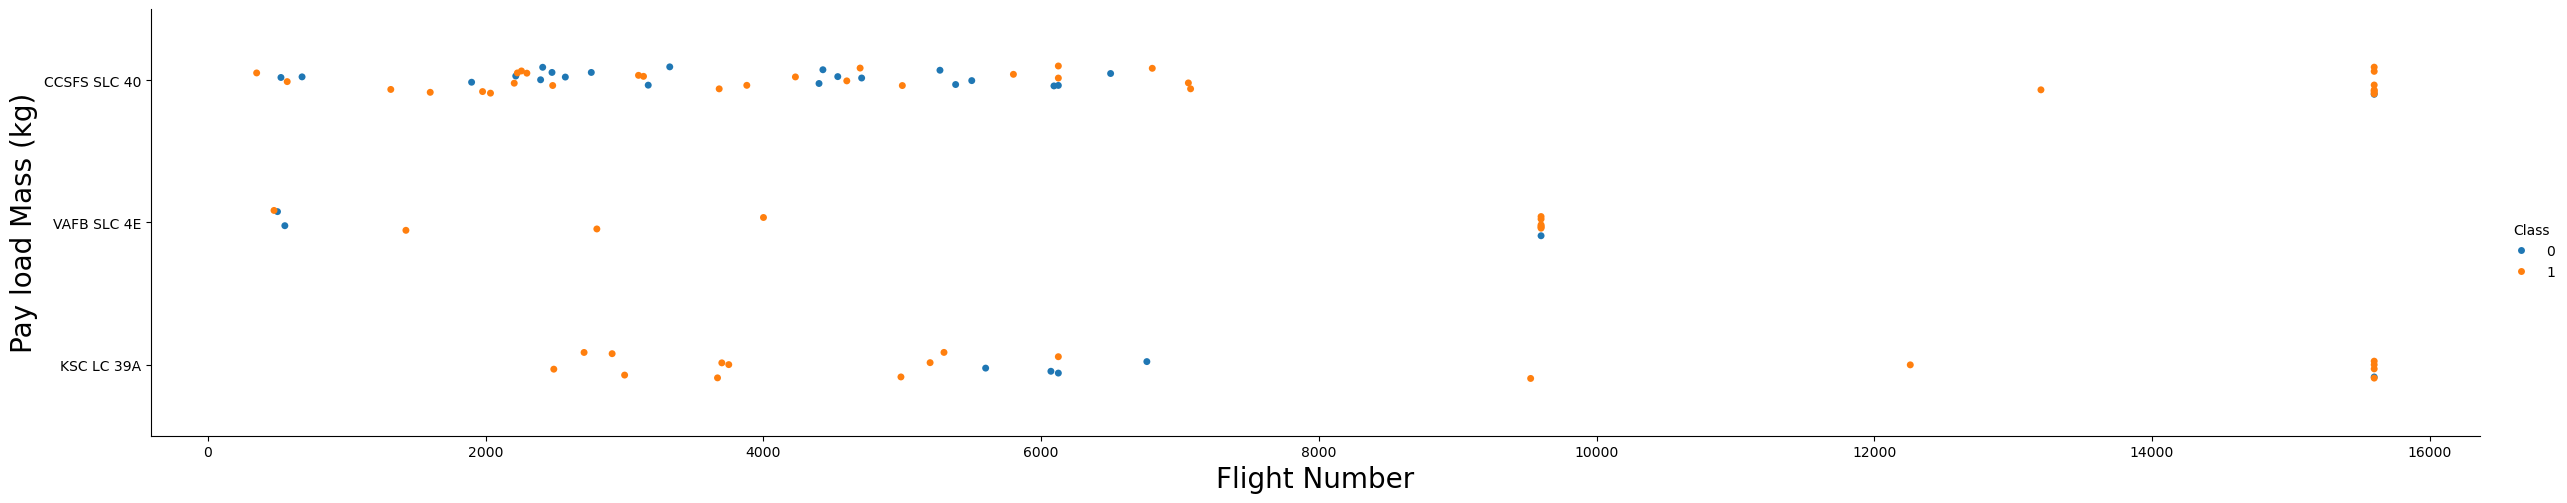

In [12]:
sns.catplot(y = "LaunchSite", x = "PayloadMass", hue = "Class", data = df, aspect = 5)
plt.xlabel("Flight Number", fontsize = 20)
plt.ylabel("Pay load Mass (kg)", fontsize = 20)
plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).

#### Visualize the relationship between success rate of each orbit type

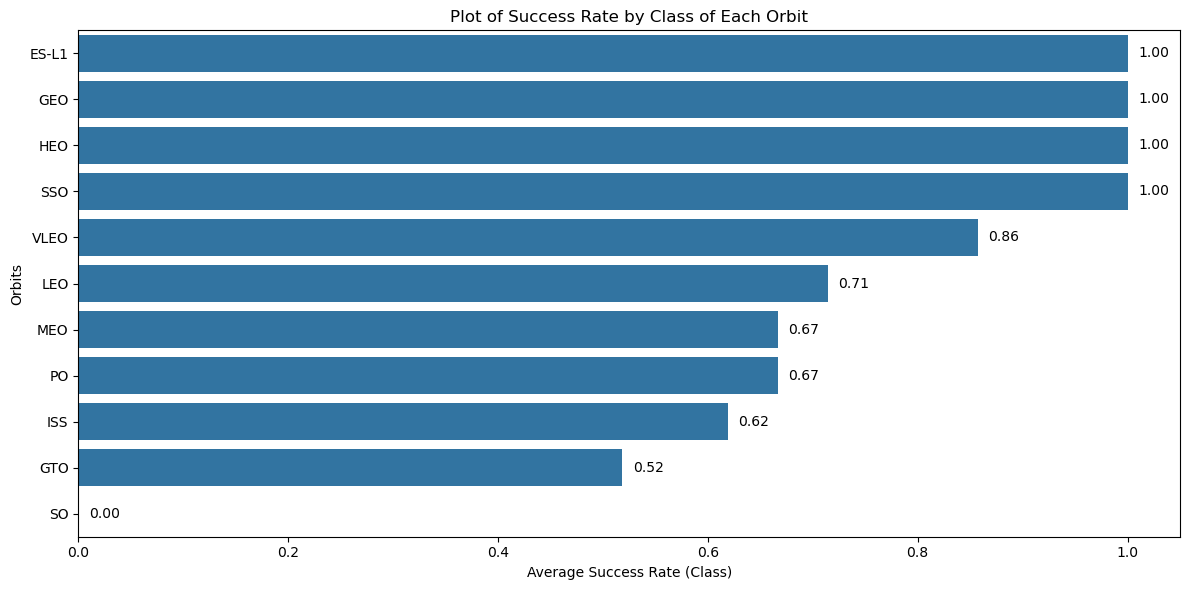

In [17]:
# Group data by 'Orbit' and calculate the mean success rate ('Class') for each orbit
grouped_orbits = df.groupby(by=['Orbit'])['Class'].mean().sort_values(ascending=False).reset_index()

# Create a figure and axis for the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Generate a horizontal bar chart
sns.barplot(x='Class', y='Orbit', data=grouped_orbits, ax=ax, orient='h')

# Add labels to each bar
for p in ax.patches:
    # Get the width of each bar
    width = p.get_width()
    
    # Add the label at the end of each bar
    ax.text(width + 0.01, p.get_y() + p.get_height() / 2, 
            f'{width:.2f}', va='center', ha='left', fontsize=10)

# Set the title and axis labels for the chart
ax.set_title('Plot of Success Rate by Class of Each Orbit', fontdict={'size': 12})
ax.set_xlabel('Average Success Rate (Class)', fontsize=10)
ax.set_ylabel('Orbits', fontsize=10)

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Display the chart
plt.show()


#### Visualize the relationship between `FlightNumber` and `Orbit Type`

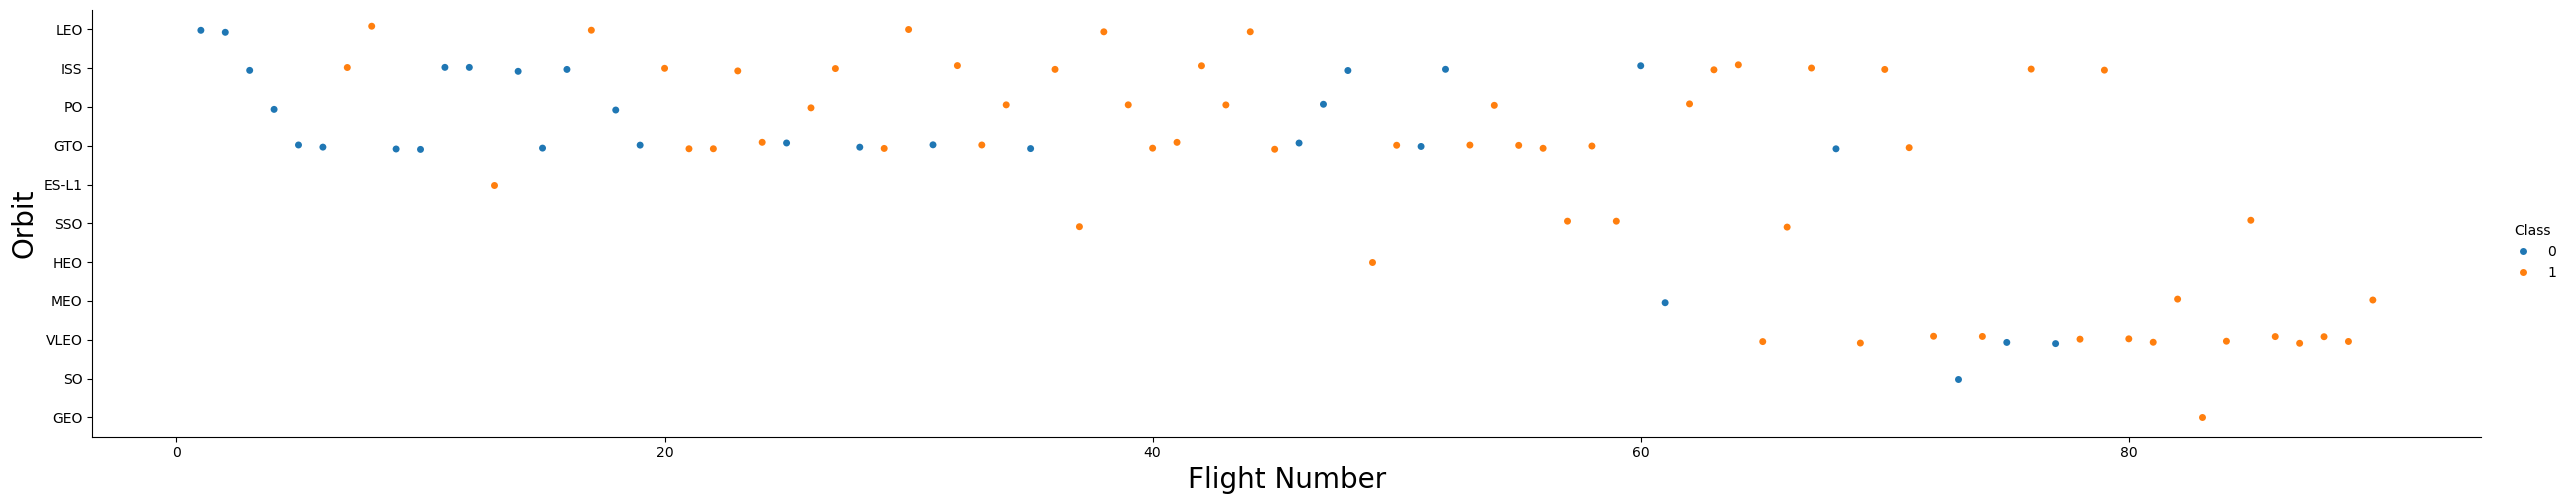

In [18]:
sns.catplot(y = "Orbit", x = "FlightNumber", hue = "Class", data = df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

### Visualize the relationship betwee Payload and Orbit type

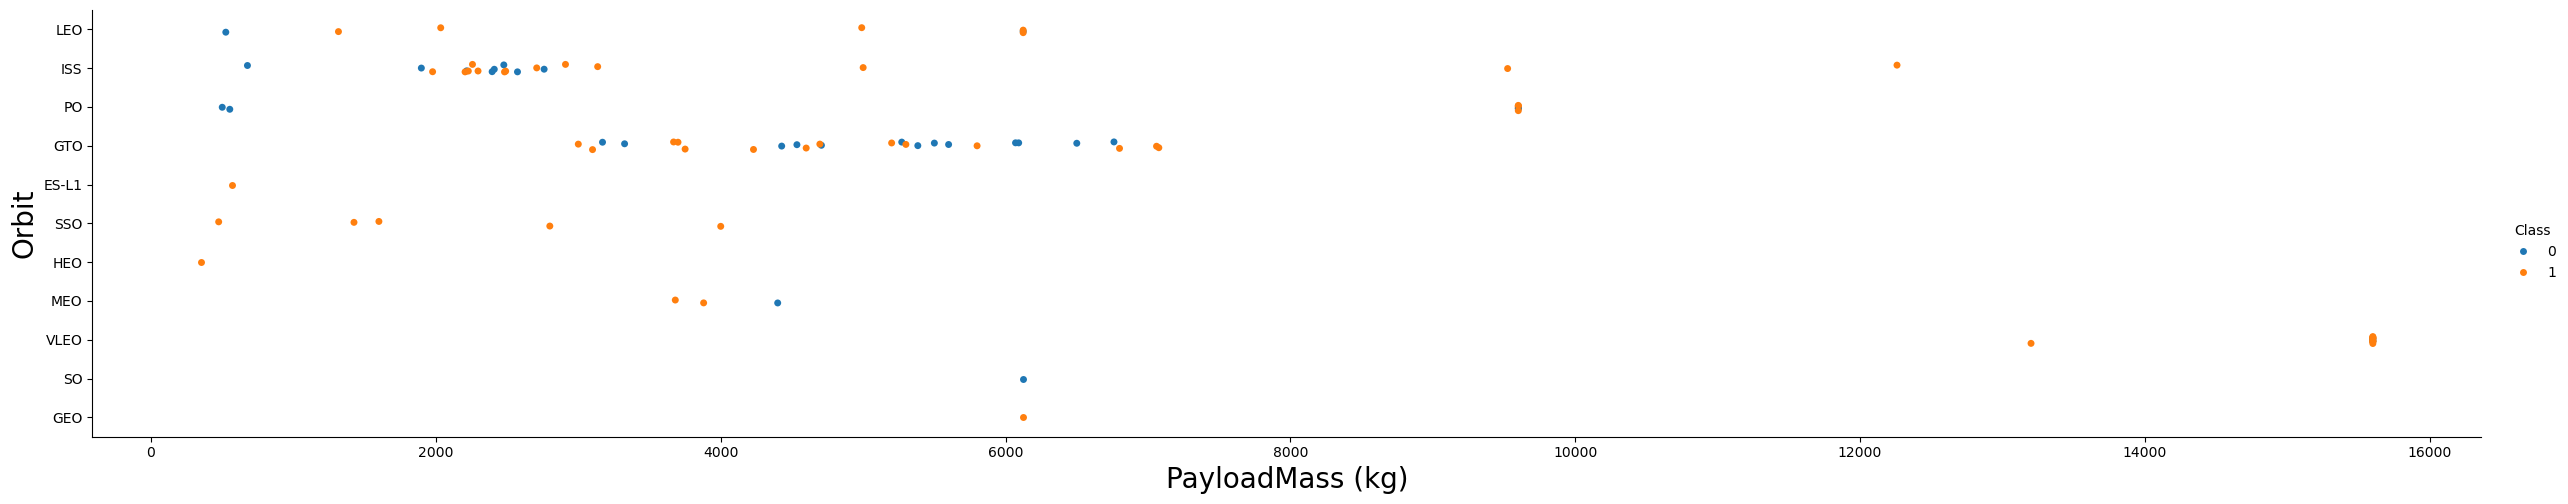

In [19]:
sns.catplot(y = "Orbit", x = "PayloadMass", hue = "Class", data = df , aspect = 5)
plt.xlabel("PayloadMass (kg)", fontsize = 20)
plt.ylabel("Orbit", fontsize = 20)
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.

### Visualize the launch success yearly trend